In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [17]:
np.random.seed(123)
train_data = pd.read_csv("activity_train.csv")
test_data = pd.read_csv("activity_test.csv")
train_data.describe()

,tBodyAcc_Mean_1,tBodyAcc_Mean_2,tBodyAcc_Mean_3,tBodyAcc_STD_1,tBodyAcc_STD_2,tBodyAcc_STD_3,tBodyAcc_Mad_1,tBodyAcc_Mad_2,tBodyAcc_Mad_3,tBodyAcc_Max_1,...,fBodyGyroJerkMag_Skewness_1,fBodyGyroJerkMag_Kurtosis_1,tBodyAcc_AngleWRTGravity_1,tBodyAccJerk_AngleWRTGravity_1,tBodyGyro_AngleWRTGravity_1,tBodyGyroJerk_AngleWRTGravity_1,tXAxisAcc_AngleWRTGravity_1,tYAxisAcc_AngleWRTGravity_1,tZAxisAcc_AngleWRTGravity_1,activity
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888,3.934595
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196,2.160171
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874,1.000000
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560,2.000000
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583,4.000000
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000,12.000000


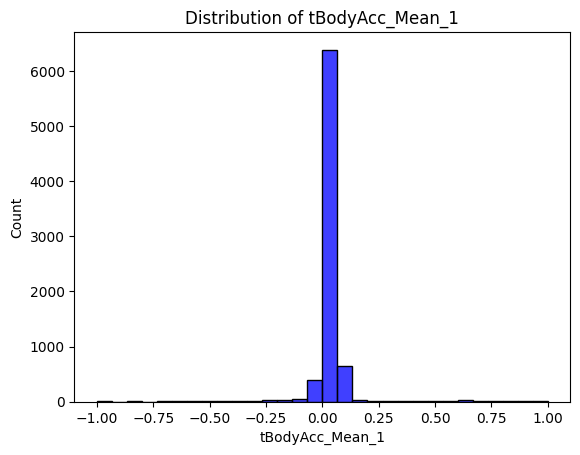

In [15]:
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
first_numeric_col = numeric_cols[0]
sns.histplot(train_data[first_numeric_col], bins=30, kde=False, color="blue")
plt.title(f"Distribution of {first_numeric_col}")
plt.xlabel(first_numeric_col)
plt.ylabel("Count")
plt.show()

In [41]:
train_data[numeric_cols[:10]].corr()

,tBodyAcc_Mean_1,tBodyAcc_Mean_2,tBodyAcc_Mean_3,tBodyAcc_STD_1,tBodyAcc_STD_2,tBodyAcc_STD_3,tBodyAcc_Mad_1,tBodyAcc_Mad_2,tBodyAcc_Mad_3,tBodyAcc_Max_1
tBodyAcc_Mean_1,1.000000,-0.635967,-0.630025,0.023420,-0.020698,-0.045023,0.030579,-0.024288,-0.049180,0.147468
tBodyAcc_Mean_2,-0.635967,1.000000,0.472460,-0.022666,0.043462,0.065096,-0.024190,0.052732,0.075577,-0.112580
tBodyAcc_Mean_3,-0.630025,0.472460,1.000000,-0.013337,0.046654,0.069783,-0.014879,0.055531,0.080151,-0.099253
tBodyAcc_STD_1,0.023420,-0.022666,-0.013337,1.000000,0.879795,0.804476,0.998320,0.858936,0.784682,0.968917
tBodyAcc_STD_2,-0.020698,0.043462,0.046654,0.879795,1.000000,0.873746,0.875431,0.996065,0.867446,0.848091
tBodyAcc_STD_3,-0.045023,0.065096,0.069783,0.804476,0.873746,1.000000,0.798354,0.866089,0.995997,0.780175
tBodyAcc_Mad_1,0.030579,-0.024190,-0.014879,0.998320,0.875431,0.798354,1.000000,0.854812,0.779153,0.960180
tBodyAcc_Mad_2,-0.024288,0.052732,0.055531,0.858936,0.996065,0.866089,0.854812,1.000000,0.862286,0.824770
tBodyAcc_Mad_3,-0.049180,0.075577,0.080151,0.784682,0.867446,0.995997,0.779153,0.862286,1.000000,0.757081
tBodyAcc_Max_1,0.147468,-0.112580,-0.099253,0.968917,0.848091,0.780175,0.960180,0.824770,0.757081,1.000000


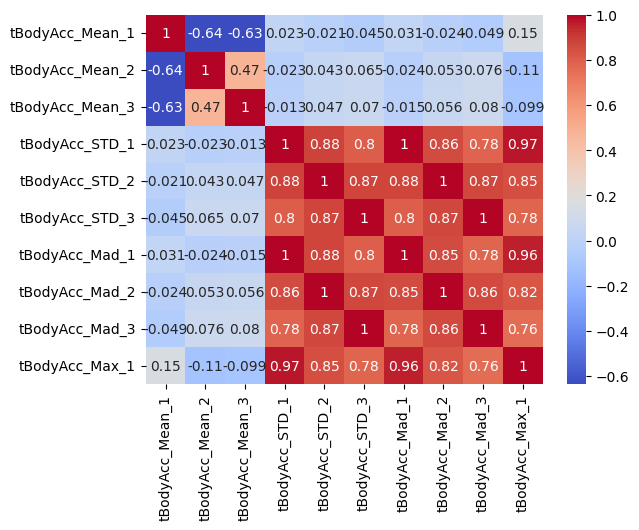

In [19]:
corr_matrix = train_data[numeric_cols[:10]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

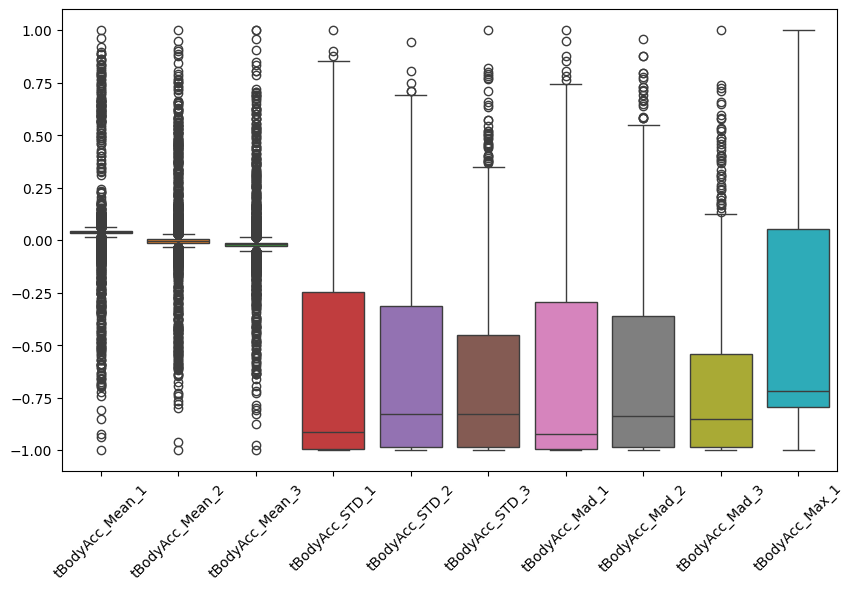

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[numeric_cols[:10]])
plt.xticks(rotation=45)
plt.show()

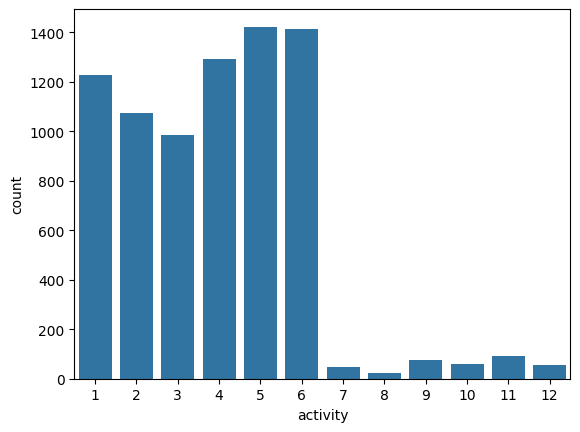

In [22]:
sns.countplot(x="activity", data=train_data)
plt.show()

In [27]:
train_labels = train_data.iloc[:, -1]
train_features = train_data.iloc[:, :-1]
test_labels = test_data.iloc[:, -1]
test_features = test_data.iloc[:, :-1]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_features, train_labels)
predictions = knn_model.predict(test_features)
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           1       0.85      0.98      0.91       496
           2       0.87      0.90      0.88       471
           3       0.95      0.78      0.85       420
           4       0.90      0.78      0.84       508
           5       0.83      0.92      0.87       556
           6       1.00      0.99      1.00       545
           7       0.89      0.74      0.81        23
           8       1.00      1.00      1.00        10
           9       0.61      0.88      0.72        32
          10       0.65      0.88      0.75        25
          11       0.79      0.47      0.59        49
          12       0.85      0.41      0.55        27

    accuracy                           0.88      3162
   macro avg       0.85      0.81      0.81      3162
weighted avg       0.89      0.88      0.88      3162



In [7]:
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8848829854522454


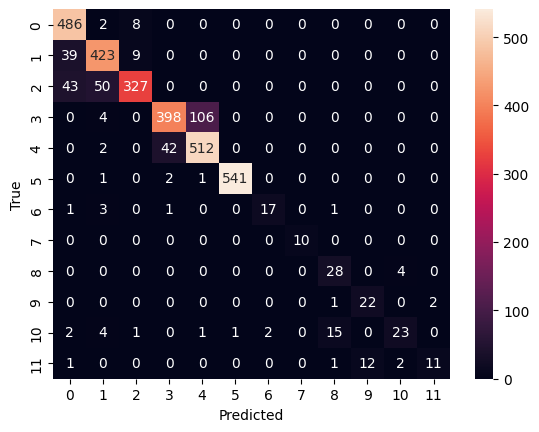

In [42]:
conf_matrix = confusion_matrix(test_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
train_sample = train_data.sample(frac=0.5)
train_labels_sample = train_sample.iloc[:, -1]
train_features_sample = train_sample.iloc[:, :-1]
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance']
}
tuned_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
tuned_knn.fit(train_features_sample, train_labels_sample)
predictions_tuned = tuned_knn.predict(test_features)
print(classification_report(test_labels, predictions_tuned))

              precision    recall  f1-score   support

           1       0.83      0.98      0.90       496
           2       0.86      0.88      0.87       471
           3       0.95      0.77      0.85       420
           4       0.88      0.81      0.84       508
           5       0.84      0.90      0.87       556
           6       1.00      0.99      0.99       545
           7       0.89      0.70      0.78        23
           8       1.00      0.90      0.95        10
           9       0.57      0.91      0.70        32
          10       0.66      0.76      0.70        25
          11       0.80      0.41      0.54        49
          12       0.72      0.48      0.58        27

    accuracy                           0.88      3162
   macro avg       0.83      0.79      0.80      3162
weighted avg       0.89      0.88      0.88      3162



In [30]:
accuracy_tuned = accuracy_score(test_labels, predictions_tuned)
print(f"Accuracy for Tuned Model: {accuracy_tuned}")

Accuracy for Tuned Model: 0.8801391524351676


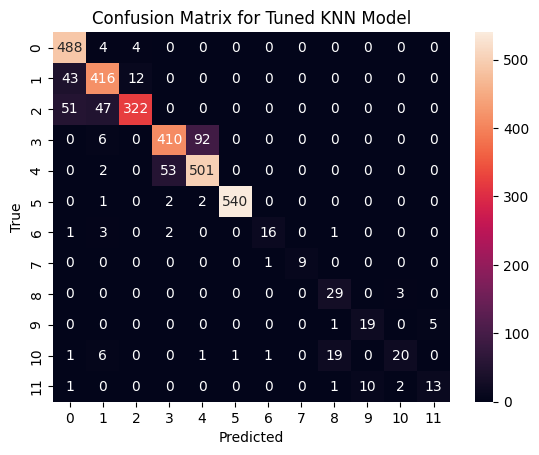

In [31]:
conf_matrix_tuned = confusion_matrix(test_labels, predictions_tuned)
sns.heatmap(conf_matrix_tuned, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Tuned KNN Model')
plt.show()

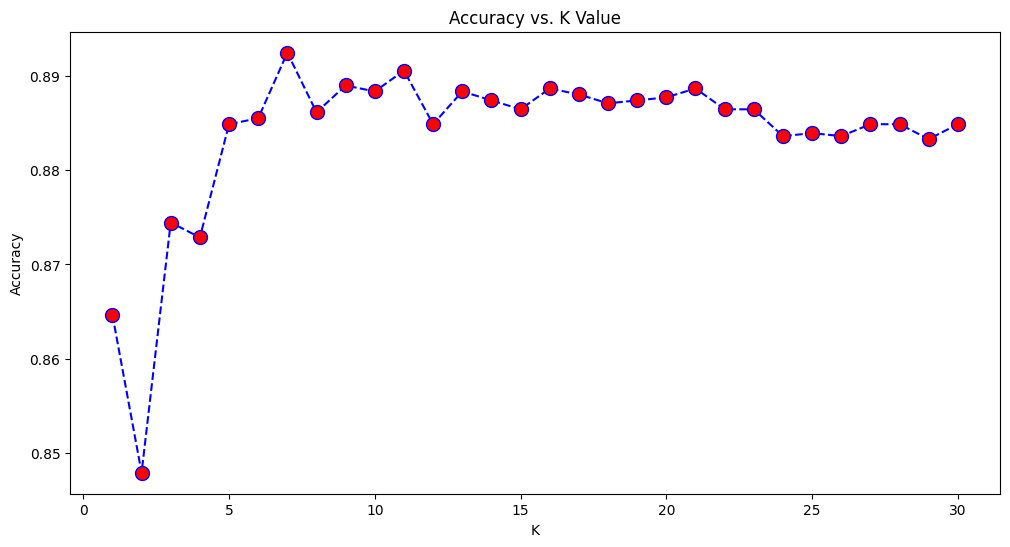

In [32]:
accuracy_scores = []
for i in np.arange(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_features, train_labels)
    pred_i = knn.predict(test_features)
    accuracy_scores.append(accuracy_score(test_labels, pred_i))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance']
}
tuned_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
tuned_knn.fit(train_features, train_labels)
predictions_tuned = tuned_knn.predict(test_features)
print(classification_report(test_labels, predictions_tuned))


In [34]:
accuracy_tuned = accuracy_score(test_labels, predictions_tuned)
print(f"Accuracy for Tuned Model: {accuracy_tuned}")

Accuracy for Tuned Model: 0.8921568627450981


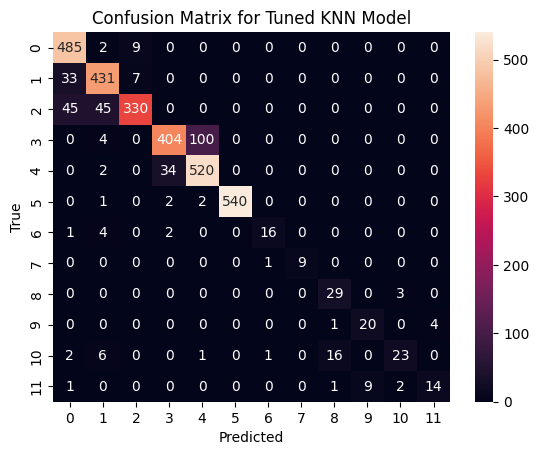

In [35]:
conf_matrix_tuned = confusion_matrix(test_labels, predictions_tuned)
sns.heatmap(conf_matrix_tuned, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Tuned KNN Model')
plt.show()

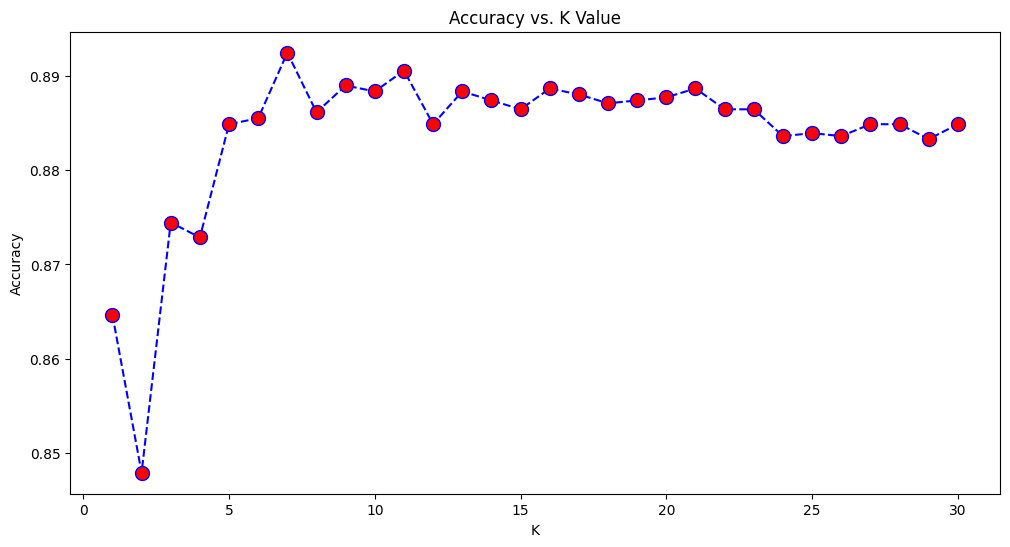

In [36]:
accuracy_scores = []
for i in np.arange(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_features, train_labels)
    pred_i = knn.predict(test_features)
    accuracy_scores.append(accuracy_score(test_labels, pred_i))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')  
plt.show()

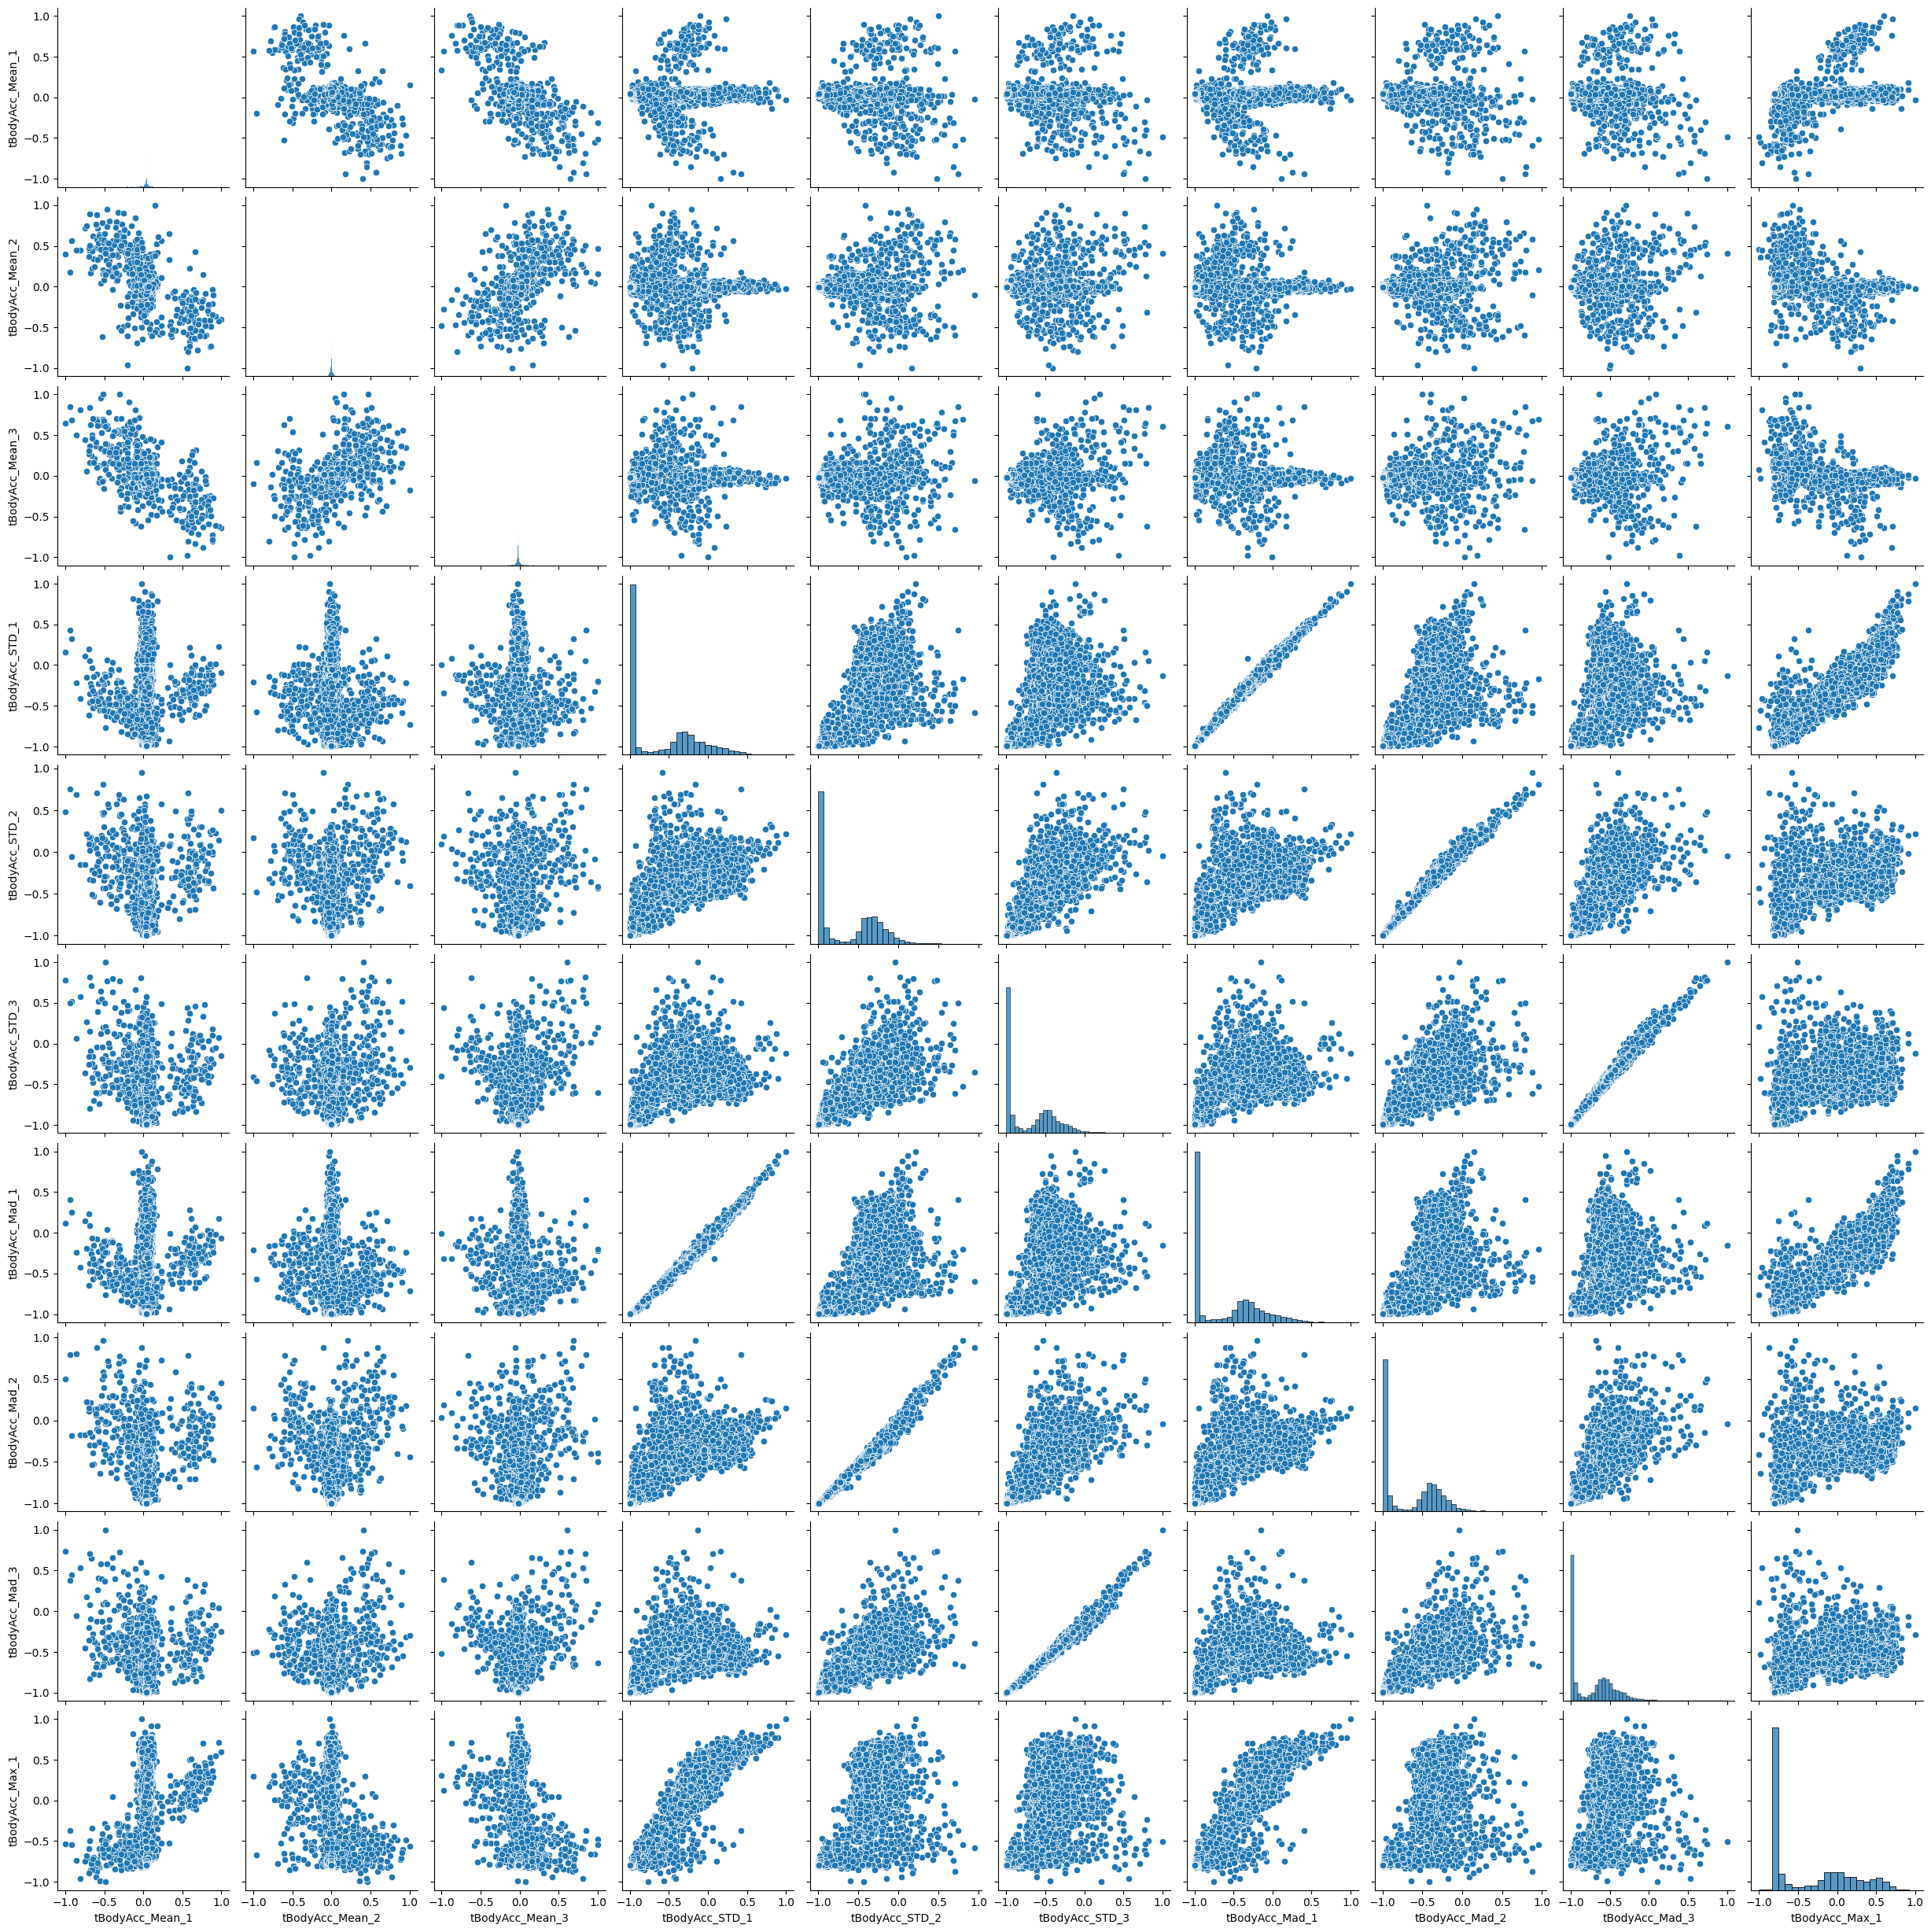

In [40]:
sns.pairplot(train_data[numeric_cols[:10]])
plt.show()